# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

## background

Dalam era informasi yang semakin digital, akses dan analisis data dari internet memiliki peran penting dalam pengambilan keputusan dan penelitian. Web scraping adalah teknik yang memungkinkan kita untuk mengumpulkan data secara otomatis dari berbagai situs web. Capstone ini bertujuan untuk latihan bagi pengguna Python untuk dapat mencoba melakukan web scraping

Untuk Capstone ini akan diperkenalkan secara umum penggunaan library BeautifulSoup,  serta bagaimana cara mengambil dan mengurai data dari halaman web. 
Sebagai kesimpulan Capstone ini bertujuaan untuk untuk memberikan pemahaman yang lebih dalam tentang web scraping sebagai alat penting dalam eksplorasi data dan pengambilan informasi dari internet. Dengan menggunakan Python, kita dapat mengakses dan menganalisis data secara efisien, membuka pintu untuk penelitian yang lebih mendalam dan pengambilan keputusan yang lebih informasional dalam berbagai domain.

## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [1]:
import requests

url_get = requests.get('https://www.exchange-rates.org/exchange-rate-history/usd-idr')

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [2]:
url_get.content[1:500]

b'!DOCTYPE html>\r\n<!--[if lt IE 9]>\r\n<html class="no-js ie8 oldie" lang="en" xml:lang=\'en\'>\r\n<![endif]-->\r\n<!--[if gt IE 8]><!--><html class="no-js" lang="en" xml:lang=\'en\'><!--<![endif]-->\r\n<head>\r\n<title>USD to IDR exchange rate history</title>\r\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\r\n<meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=5">\r\n<meta charset="utf-8" /><meta http-equiv="Content-Type" content="text/html; charset=utf-8" />\r\n<base href="http'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [3]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")

In [4]:
print(type(soup))

<class 'bs4.BeautifulSoup'>


In [5]:
print(soup.prettify()[:500])

<!DOCTYPE html>
<!--[if lt IE 9]>
<html class="no-js ie8 oldie" lang="en" xml:lang='en'>
<![endif]-->
<!--[if gt IE 8]><!-->
<html class="no-js" lang="en" xml:lang="en">
 <!--<![endif]-->
 <head>
  <title>
   USD to IDR exchange rate history
  </title>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1, maximum-scale=5" name="viewport"/>
  <meta charset="utf-8">
   <meta content="text/html; charset=utf-8" http-equiv="Content-Type">
   


## Finding the right key to scrap the data & Extracting the right information

Find the key and put the key into the `.find()` Put all the exploring the right key at this cell. 
kita akan coba membuat kode menggunakan SOUP untuk mendapatkan data dari Web yang kita inginkan.

In [6]:
table = soup.find('tbody') #tbody
print(table.prettify()[1:500])

tbody>
 <tr>
  <td>
   <a class="w" href="/exchange-rate-history/usd-idr-2023-09-01">
    September 1, 2023
   </a>
   <a class="n" href="/exchange-rate-history/usd-idr-2023-09-01">
    2023-9-1
   </a>
  </td>
  <td>
   <span class="w">
    <span class="nowrap">
     <span class="currencySymbol">
      $
     </span>
     1 =
    </span>
    <span class="nowrap">
     <span class="currencySymbol">
      Rp
     </span>
     15,258
    </span>
   </span>
   <span class="n">
    <span class="now


In [7]:
table.find_all('span',attrs={'class':'w'})[:5]

[<span class="w"><span class="nowrap"><span class="currencySymbol">$</span>1 =</span> <span class="nowrap"><span class="currencySymbol">Rp</span>15,258</span></span>,
 <span class="w"><span class="nowrap"><span class="currencySymbol">$</span>1 =</span> <span class="nowrap"><span class="currencySymbol">Rp</span>15,225</span></span>,
 <span class="w"><span class="nowrap"><span class="currencySymbol">$</span>1 =</span> <span class="nowrap"><span class="currencySymbol">Rp</span>15,223</span></span>,
 <span class="w"><span class="nowrap"><span class="currencySymbol">$</span>1 =</span> <span class="nowrap"><span class="currencySymbol">Rp</span>15,202</span></span>,
 <span class="w"><span class="nowrap"><span class="currencySymbol">$</span>1 =</span> <span class="nowrap"><span class="currencySymbol">Rp</span>15,248</span></span>]

In [8]:
table.find_all('span',attrs={'class':'w'})[0].text

'$1 = Rp15,258'

In [9]:
table.find_all('a',attrs={'class':'n'})[:5]

[<a class="n" href="/exchange-rate-history/usd-idr-2023-09-01">2023-9-1</a>,
 <a class="n" href="/exchange-rate-history/usd-idr-2023-08-31">2023-8-31</a>,
 <a class="n" href="/exchange-rate-history/usd-idr-2023-08-30">2023-8-30</a>,
 <a class="n" href="/exchange-rate-history/usd-idr-2023-08-29">2023-8-29</a>,
 <a class="n" href="/exchange-rate-history/usd-idr-2023-08-28">2023-8-28</a>]

In [10]:
table.find_all('a',attrs={'class':'n'})[0].text

'2023-9-1'

Finding row length.

In [11]:
row = table.find_all('a',attrs={'class':'n'})
row_length = len(row)
row_length

130

extrac menggunakan "Lopping"

Do the scrapping process here 
Kita akan melakukan scarpping proses. dimana proses ini merupakan langkah penting dalam pengambilan data dari sebuat web. dan setelah kita melakukan scrapping, kita akan coba melakukan analisa untuk mengambil keputusan. Dan data ini akan kita buat visual rate dollar terhadap rupiah.

In [12]:
temp = [] #initiating a tuple

for i in range(0, row_length):

    #scrapping process
    #get period
    period = table.find_all('a',attrs={'class':'n'})[i].text
    period = period.strip()
    
    exchange = table.find_all('span',attrs={'class':'w'})[i].text
    exchange = exchange.strip()
      
    temp.append((period,exchange))
    
temp[:5]

[('2023-9-1', '$1 = Rp15,258'),
 ('2023-8-31', '$1 = Rp15,225'),
 ('2023-8-30', '$1 = Rp15,223'),
 ('2023-8-29', '$1 = Rp15,202'),
 ('2023-8-28', '$1 = Rp15,248')]

In [13]:
temp = temp [::-1] # menginvert / membalik list nya
temp[:10]

[('2023-3-6', '$1 = Rp15,354'),
 ('2023-3-7', '$1 = Rp15,429'),
 ('2023-3-8', '$1 = Rp15,449'),
 ('2023-3-9', '$1 = Rp15,495'),
 ('2023-3-10', '$1 = Rp15,503'),
 ('2023-3-13', '$1 = Rp15,416'),
 ('2023-3-14', '$1 = Rp15,380'),
 ('2023-3-15', '$1 = Rp15,459'),
 ('2023-3-16', '$1 = Rp15,429'),
 ('2023-3-17', '$1 = Rp15,375')]

## Creating data frame & Data wrangling

Put the array into dataframe

In [14]:
import pandas as pd

df = pd.DataFrame(temp, columns = ('period','daily_exchange'))
df.head()

,period,daily_exchange
0,2023-3-6,"$1 = Rp15,354"
1,2023-3-7,"$1 = Rp15,429"
2,2023-3-8,"$1 = Rp15,449"
3,2023-3-9,"$1 = Rp15,495"
4,2023-3-10,"$1 = Rp15,503"


In [15]:
df[['dollar','rupiah']]=df['daily_exchange'].str.split(' = ', expand=True)

In [16]:
df[['simbol_Rp','Nominal_Rupiah']]=df['rupiah'].str.split('Rp', expand=True)

In [17]:
df

,period,daily_exchange,dollar,rupiah,simbol_Rp,Nominal_Rupiah
0,2023-3-6,"$1 = Rp15,354",$1,"Rp15,354",,"15,354"
1,2023-3-7,"$1 = Rp15,429",$1,"Rp15,429",,"15,429"
2,2023-3-8,"$1 = Rp15,449",$1,"Rp15,449",,"15,449"
3,2023-3-9,"$1 = Rp15,495",$1,"Rp15,495",,"15,495"
4,2023-3-10,"$1 = Rp15,503",$1,"Rp15,503",,"15,503"
...,...,...,...,...,...,...
125,2023-8-28,"$1 = Rp15,248",$1,"Rp15,248",,"15,248"
126,2023-8-29,"$1 = Rp15,202",$1,"Rp15,202",,"15,202"
127,2023-8-30,"$1 = Rp15,223",$1,"Rp15,223",,"15,223"
128,2023-8-31,"$1 = Rp15,225",$1,"Rp15,225",,"15,225"


In [18]:
df['Nominal_Rupiah']=df['Nominal_Rupiah'].str.replace(',','.')

In [19]:
df['Nominal_Rupiah']=df['Nominal_Rupiah'].astype('float64')

In [20]:
df['period']=df['period'].astype('datetime64[ns]')

Do the data cleaning here.
Kita akan membersihkan kolom kolam dari data frame kita, dari data yang tidak diperlukan untuk analisa proses selanjut nya. dimana data yang diperlukan hanya period dan rate dollar terhadap rupiah)

In [21]:
df.drop(columns=['daily_exchange','dollar','rupiah','simbol_Rp'], inplace=True)

Data visualisation. Setelah membersihkan data dari kolom-kolom yang tidak diperlukan, sekarang kita akan membuat plot pergerakkan rate dollar terhadap rupaih, agar lebih mudah untuk mendapatkan insight.

In [22]:
df = df.set_index('period')

<Axes: xlabel='period'>

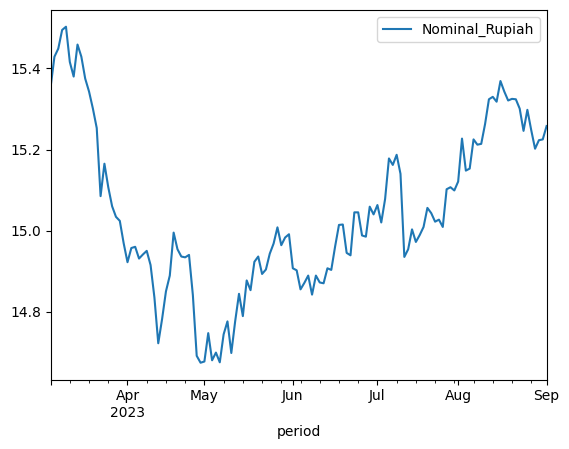

In [23]:
df.plot()

### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualisation. 

<Axes: xlabel='period'>

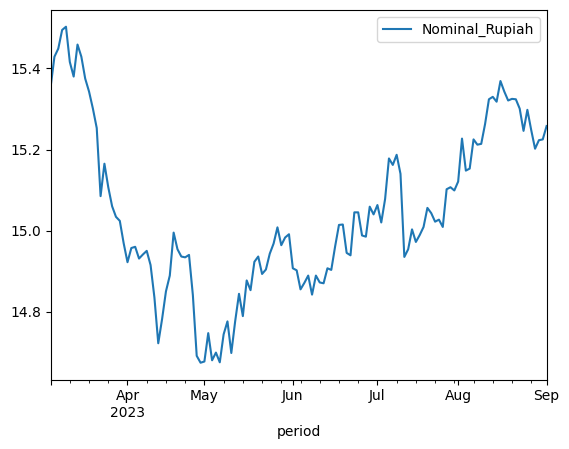

In [24]:
df.plot()

(Put your analysis and conclusion here.)
- Nilai tukar dollar terhadap rupiah mencapai nilai tertinggi nya di sekitar bulan Maret 2023
- Nilai tukar dollar terhadap rupiah mencapai nilai terendah nya di sekitar bulan Mei 2023
- Jaga kesehatan Finansial, karena nilai tukar ini berfluktuasi cukup besar, maka siapkan dana darurat. dan hindari hutang
- Mulai coba dipikirkan untuk medeverfisiksi asset ke dalam bentuk dollar terutama ketika rate dollar lagi turun, seperti di bulan Mei 2023.

### Implement it at the webapps

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.